In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [4]:
file_1 = '대한민국 도시별 기후.csv'

In [5]:
df1 = pd.read_csv(file_1, encoding = 'UTF-8')

In [6]:
df1.head()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
0,105,강릉,1970-01,-1.2,4.3,-5.1,10.1,4.4,12.3,52,18,195.8,64.18
1,105,강릉,1970-02,2.2,6.7,-1.9,58.8,4.3,15.7,53,17,173.3,57.52
2,105,강릉,1970-03,2.4,7.0,-1.8,11.8,4.0,11.7,53,20,232.9,63.01
3,105,강릉,1970-04,11.4,16.8,6.2,1.0,3.2,14.3,63,15,195.4,49.71
4,105,강릉,1970-05,17.7,22.1,13.6,78.4,2.7,15.0,68,17,171.3,39.01


In [7]:
df1.tail()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
10283,184,제주,2023-03,12.3,16.4,8.5,49.6,2.7,8.8,66,26,211.1,56.84
10284,184,제주,2023-04,15.5,19.4,11.8,62.1,3.6,14.0,69,14,204.1,52.27
10285,184,제주,2023-05,19.1,23.1,16.0,269.3,2.7,8.7,77,28,180.3,41.87
10286,184,제주,2023-06,23.4,26.7,20.4,213.0,3.1,10.9,76,29,170.2,39.51
10287,184,제주,2023-07,28.1,31.4,25.6,273.2,3.0,10.8,75,39,124.6,28.43


In [8]:
df1['지점명'].value_counts()

지점명
강릉    643
서울    643
인천    643
수원    643
서산    643
청주    643
대전    643
포항    643
군산    643
대구    643
울산    643
광주    643
부산    643
통영    643
여수    643
제주    643
Name: count, dtype: int64

In [9]:
def change_local(string):
    if '강릉' == string:
        return '강원특별자치도'
    elif '서울' == string:
        return '서울특별시'
    elif '제주' == string:
        return '제주도'
    elif '여수' == string:
        return '전라남도'
    elif '부산' == string:
        return '부산광역시'
    elif '광주' == string:
        return '광주광역시'
    elif '울산' == string:
        return '울산광역시'
    elif '대구' == string:
        return '대구광역시'
    elif '인천' == string:
        return '인천광역시'
    elif '수원' == string:
        return '경기도'
    elif '서산' == string:
        return '충청남도'
    elif '청주' == string:
        return '충청북도'
    elif '대전' == string:
        return '대전광역시'
    elif '포항' == string:
        return '경상북도'
    elif '군산' == string:
        return '전라북도'
    else:
        return '경상남도'

In [10]:
df1['지점명'] = df1['지점명'].apply(change_local)

In [11]:
df1.head()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
0,105,강원특별자치도,1970-01,-1.2,4.3,-5.1,10.1,4.4,12.3,52,18,195.8,64.18
1,105,강원특별자치도,1970-02,2.2,6.7,-1.9,58.8,4.3,15.7,53,17,173.3,57.52
2,105,강원특별자치도,1970-03,2.4,7.0,-1.8,11.8,4.0,11.7,53,20,232.9,63.01
3,105,강원특별자치도,1970-04,11.4,16.8,6.2,1.0,3.2,14.3,63,15,195.4,49.71
4,105,강원특별자치도,1970-05,17.7,22.1,13.6,78.4,2.7,15.0,68,17,171.3,39.01


In [12]:
df1.to_csv('대한민국_시도별_기후.csv')

/home/jjam/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


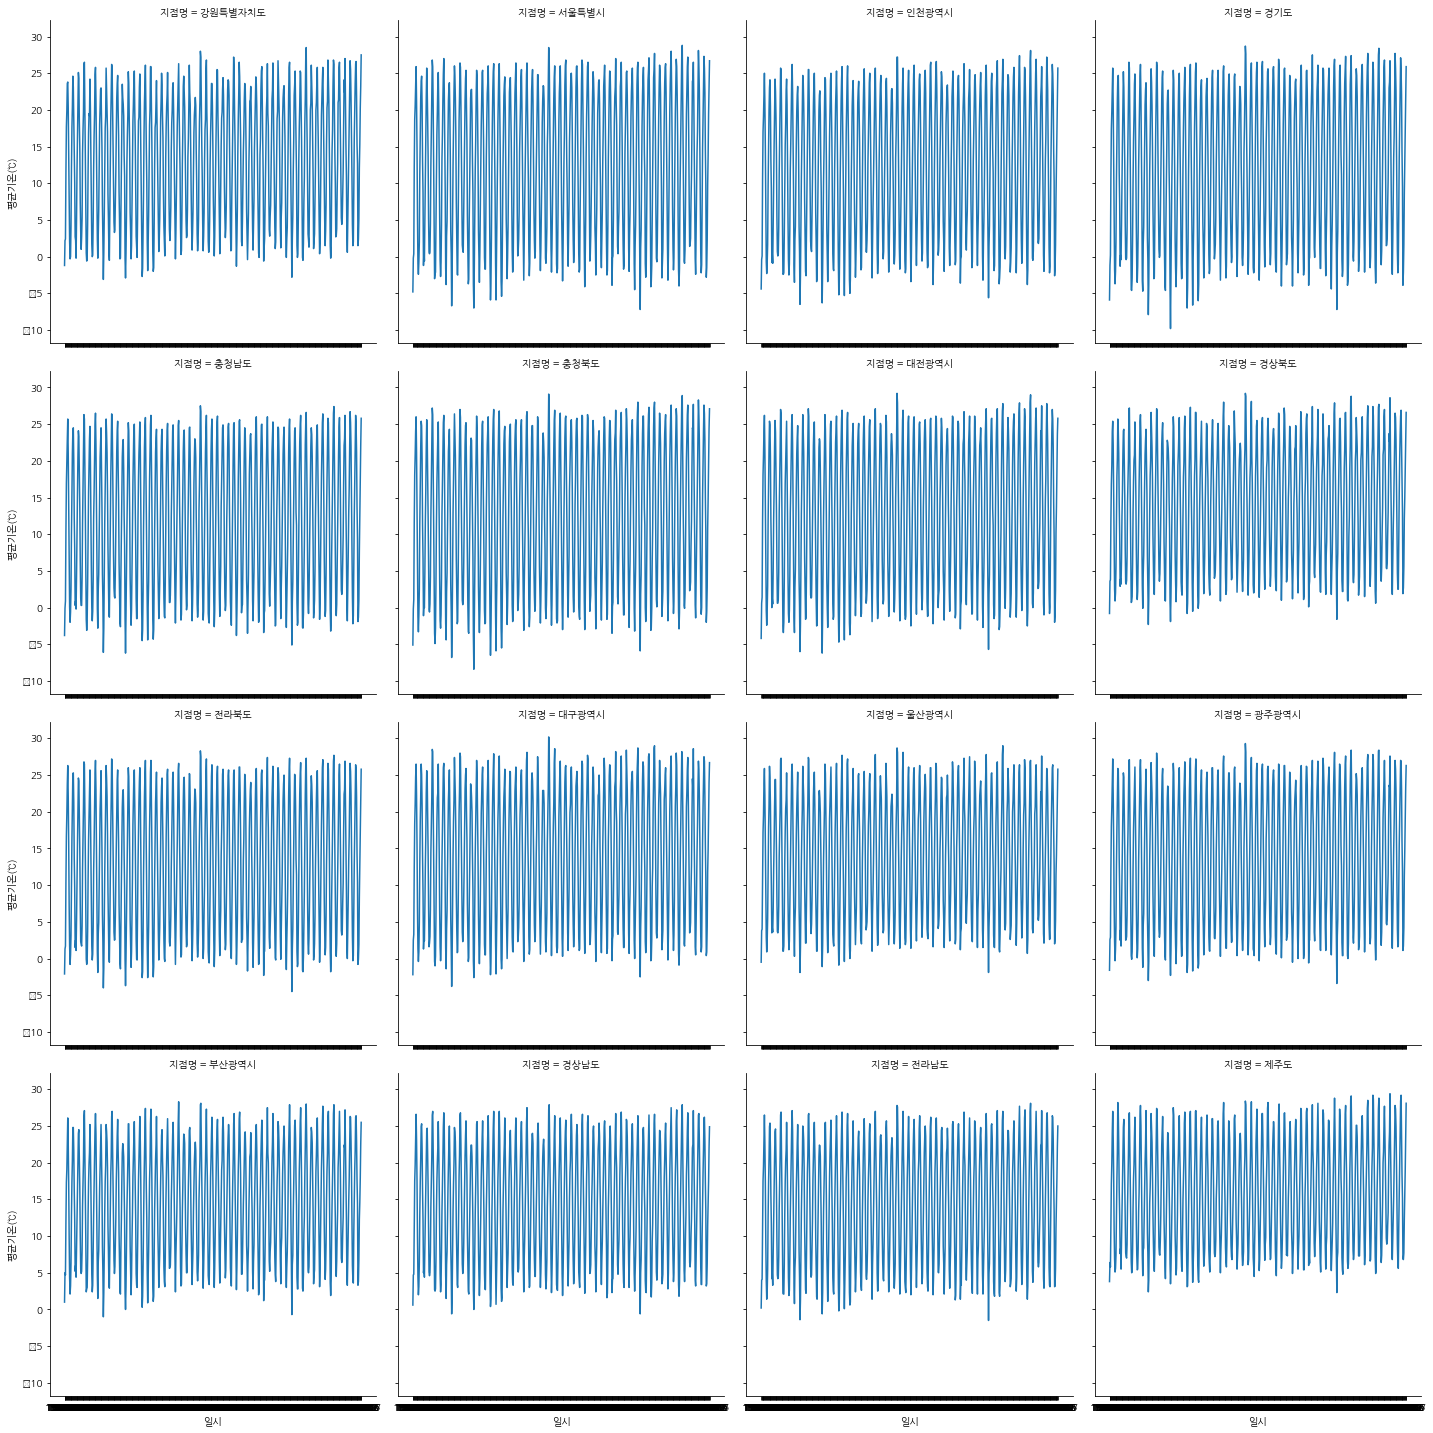

In [13]:
#fig, axes = plt.subplots(figsize = (20,10))
#axes.set_ylim([-20, 50])
sns.relplot(data = df1, x = '일시', y = '평균기온(℃)', kind = 'line', col = '지점명', col_wrap = 4)